#Neues Notebook für Auswertung

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy import stats
import statistics
from google.colab import drive 
import statsmodels.api as sm
drive.mount('/content/drive',force_remount=True)
import os 
os.chdir("/content/drive/My Drive/Snippets_Adventures/Daten")
!ls

#Set path to your data here
#We mä i sim google drive ä vrchnüpfig zum teilte ordner macht (rächtsklicke ufe teilt ordner), de chame diräkt uf date im teilte ordner zuegrife u de würd dr path unge theoretisch für aui glich funktioniere
path = "/content/drive/My Drive/Snippets_Adventures/Daten/"


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive
 CAS_Data.xlsx			 ID_Age_Gender.xlsx
'EF_Hearts&Flowers.xlsx'	 MotorSkillsHandwriting.ipynb
 EF_Maulwurf.xlsx		 Overview_neu.pdf
 Feinmotorik_Kindergarten.xlsx	'Schreiben_Beschreibung der Variablen.docx'
 GRAFOS_Feinmotorik_0908.xlsx	 Schreiben.xlsx


#Read Data

In [ ]:
data = pd.read_excel(path+"CAS_Data.xlsx")
data.head()

,Unnamed: 0,ID,Geschlecht,Alter_Monate,Alter_Jahre,spanLength,recognition_fields_correct,recognition_fieldsCorrect_irrespectivePosition,correct_MG,trials_MG,RT_shifting_MG,accuracy_shifting_MG,correct_FGT,trials_FGT,RT_inhibition_FGT,accuracy_inhibition_FGT,TIMEON,TIMEOFF,NIV,PRESS,FineMotor_2018,FineMotor_2019,Mean_VMI,FeinmotorikFirstGradeSumme
0,0,1104,0.0,89.0,7.0,0.0,9.0,21.0,0.0,60.0,NaN,0.000000,26.0,36.0,1053.230769,0.722222,13529.0,25071.75,2.800265,1.115598,5.0,9.0,NaN,NaN
1,1,1106,1.0,91.0,7.0,3.0,37.0,53.0,51.0,60.0,642.078431,0.850000,31.0,36.0,830.354839,0.861111,22556.5,26806.00,5.444927,2.518980,6.0,6.0,NaN,NaN
2,2,1107,1.0,94.0,7.0,2.0,20.0,39.0,49.0,60.0,841.000000,0.816667,32.0,36.0,696.625000,0.888889,15633.0,38418.00,2.219918,1.332407,6.0,8.0,NaN,NaN
3,3,1108,0.0,81.0,6.0,2.0,12.0,21.0,52.0,60.0,853.480769,0.866667,34.0,36.0,767.794118,0.944444,19460.5,28783.50,4.365220,1.880460,10.0,10.0,NaN,NaN
4,4,1109,1.0,83.0,6.0,3.0,29.0,34.0,0.0,60.0,NaN,0.000000,0.0,36.0,NaN,0.000000,20882.0,52177.25,3.530073,0.966778,4.0,4.0,NaN,NaN


##Frage 1: Are there cross-sectional associations (bivariate correlations) among fine motor skills, visual-motor integration, and executive functions in first grade? 
###Korrelationsmatrix zeigen und erklären, siehe Resultate unten
####Drop unplausible observations


In [ ]:
data2= data[data['accuracy_inhibition_FGT']!=0]

In [ ]:

 # Die einzelnen Korrelationskoeffizienten könnten wir dann in eine Tabelle tun. 
FM_FS1 = data2[['recognition_fields_correct', 'accuracy_inhibition_FGT', 'accuracy_shifting_MG', 'FeinmotorikFirstGradeSumme', 'Mean_VMI']]
FM_FS1 = FM_FS1.rename({'recognition_fields_correct': 'EF_Working_Memory', 'accuracy_inhibition_FGT' : 'EF_Inhibition', 'accuracy_shifting_MG' : 'EF_Shifting', 'FeinmotorikFirstGradeSumme' : 'Feinmotorskills', 'Mean_VMI' : 'Visualmotorintegration'}, axis=1)
FM_FS1.corr().round(3)

,EF_Working_Memory,EF_Inhibition,EF_Shifting,Feinmotorskills,Visualmotorintegration
EF_Working_Memory,1.000,0.098,0.115,0.050,0.179
EF_Inhibition,0.098,1.000,0.366,0.354,0.460
EF_Shifting,0.115,0.366,1.000,-0.007,0.174
Feinmotorskills,0.050,0.354,-0.007,1.000,0.705
Visualmotorintegration,0.179,0.460,0.174,0.705,1.000


In [ ]:
#Diese Korrelation aus der FUnktion unten für alle der in der Matrix oben gezeigten Variabeln berechenen
#dann eine schöne Tabelle machen mit Korrelationen und dazugehörigen P-Werten
#P-Wert z.B in Klammer nach der Korrelation, z.B. 0.35 (0.02)

FM_FS2=FM_FS1[(np.isnan(FM_FS1['EF_Inhibition'])==False) & (np.isnan(FM_FS1['Feinmotorskills'])==False)]
#erster Wert ist Korrelation, zweiter P-Wert
stats.pearsonr(FM_FS2['EF_Inhibition'], FM_FS2['Feinmotorskills'] )

(0.3539132039945194, 0.018430326306743156)

##Frage 2: Do fine motor skills in kindergarten predict handwriting (NIV) in first grade (linear regression)?
Regression machen:  NIV ~ FineMotor_2018 + Alter_Monate + Geschlecht

In [ ]:
data3= data[['FineMotor_2018', 'Alter_Monate', 'NIV', 'Geschlecht']]
data3= data3.dropna()
X = data3[['FineMotor_2018', 'Alter_Monate', 'Geschlecht']]
y = data3['NIV']
data3

,FineMotor_2018,Alter_Monate,NIV,Geschlecht
0,5.0,89.0,2.800265,0.0
1,6.0,91.0,5.444927,1.0
2,6.0,94.0,2.219918,1.0
3,10.0,81.0,4.365220,0.0
4,4.0,83.0,3.530073,1.0
...,...,...,...,...
110,11.0,89.0,3.888968,1.0
112,11.0,81.0,4.249640,0.0
113,5.0,93.0,3.462912,1.0
115,7.0,97.0,3.412500,1.0


[0.9564554691314697, 0.007205253001302481]

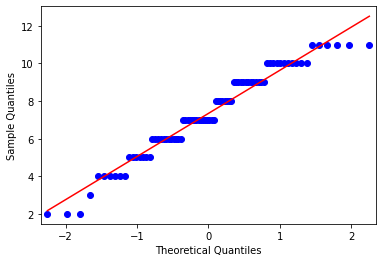

In [ ]:
#Check regression assumptions
#data not normal, but not needed for OLS, so ok
fig = sm.qqplot(data3['FineMotor_2018'].dropna(), line='s')
niv_shapiro = list(shapiro(data3['FineMotor_2018']))
niv_shapiro


Text(0.5, 1.0, 'Zeit auf Papier')

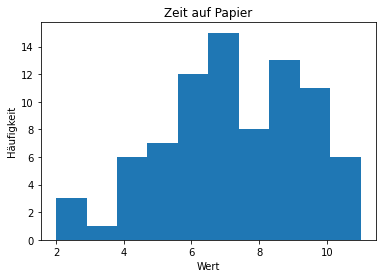

In [ ]:
plt.hist(data3['FineMotor_2018'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Zeit auf Papier')

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('NIV ~ FineMotor_2018 + Alter_Monate + Geschlecht', data = data3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    NIV   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.347
Date:                Thu, 07 Oct 2021   Prob (F-statistic):              0.265
Time:                        12:13:34   Log-Likelihood:                -166.98
No. Observations:                  82   AIC:                             342.0
Df Residuals:                      78   BIC:                             351.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.0793      3.691      1.

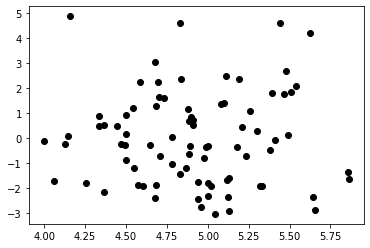

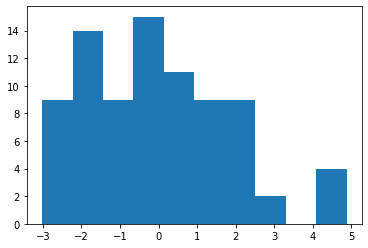

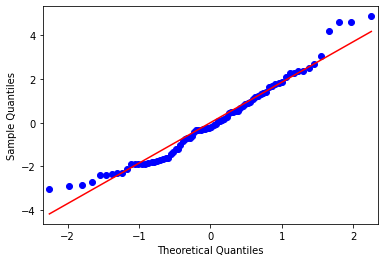

In [ ]:
#check for homoskedasticity
#looks ok
plt.plot(results.fittedvalues, results.resid, 'o', color='black');
plt.show()
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test)

#errors are normal, which is good
plt.hist(results.resid)
fig = sm.qqplot(results.resid.dropna(), line='s')


##Frage 3: Do fine motor skills in kindergarten predict executive functions in first grade?
Regression machen: EF ~ FineMotor_2018 + Alter_Monate + Geschlecht

In [ ]:
data4= data[['FineMotor_2018', 'Alter_Monate', 'accuracy_inhibition_FGT', 'Geschlecht', 'accuracy_shifting_MG', 'recognition_fields_correct' ]]
data4= data4.dropna()
data4=data4[(data4['accuracy_inhibition_FGT']!=0) & (data4['accuracy_shifting_MG']!=0)]



In [ ]:
model = smf.ols('accuracy_inhibition_FGT ~ FineMotor_2018 + Alter_Monate + Geschlecht', data = data4)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     accuracy_inhibition_FGT   R-squared:                       0.058
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     1.125
Date:                     Wed, 06 Oct 2021   Prob (F-statistic):              0.347
Time:                             17:42:10   Log-Likelihood:                 38.324
No. Observations:                       59   AIC:                            -68.65
Df Residuals:                           55   BIC:                            -60.34
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

[('Lagrange multiplier statistic', 2.363988004461954),
 ('p-value', 0.5003734459761997),
 ('f-value', 0.7652336129390066),
 ('f p-value', 0.5184266644397584)]

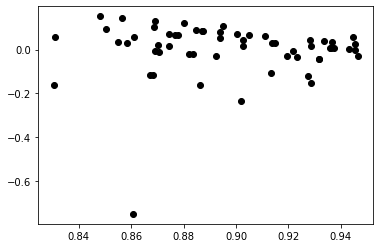

In [ ]:
#check for homoskedasticity
#looks ok
plt.plot(results.fittedvalues, results.resid, 'o', color='black');

from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test)

In [ ]:
model = smf.ols('accuracy_shifting_MG ~ FineMotor_2018 + Alter_Monate + Geschlecht', data = data4)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     accuracy_shifting_MG   R-squared:                       0.226
Model:                              OLS   Adj. R-squared:                  0.184
Method:                   Least Squares   F-statistic:                     5.346
Date:                  Wed, 06 Oct 2021   Prob (F-statistic):            0.00265
Time:                          17:42:11   Log-Likelihood:                 68.961
No. Observations:                    59   AIC:                            -129.9
Df Residuals:                        55   BIC:                            -121.6
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.435

[('Lagrange multiplier statistic', 3.2292009955186742),
 ('p-value', 0.35761872426873315),
 ('f-value', 1.0615235805823529),
 ('f p-value', 0.37296024284166707)]

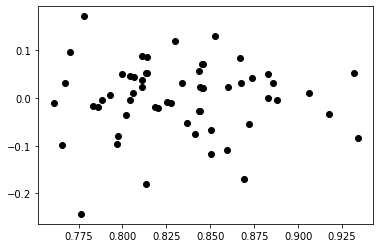

In [ ]:
#check for homoskedasticity
#looks ok
plt.plot(results.fittedvalues, results.resid, 'o', color='black');

from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test)

0.2743466556259244

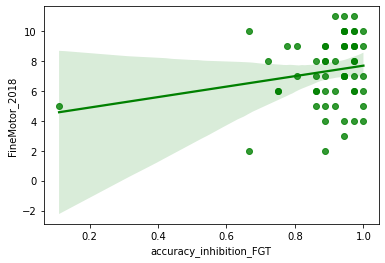

In [ ]:
sns.regplot(x='accuracy_inhibition_FGT', y='FineMotor_2018', data=data4, color='green');
data['accuracy_inhibition_FGT'].corr(data['FineMotor_2018'])

0.054071485646490475

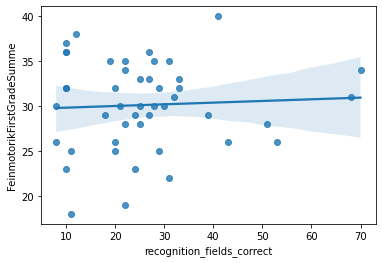

In [ ]:
sns.regplot(x='recognition_fields_correct', y='FeinmotorikFirstGradeSumme', data=data);
data['recognition_fields_correct'].corr(data['FeinmotorikFirstGradeSumme'])

0.054071485646490475

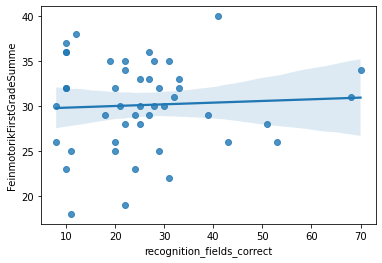

In [ ]:
# Executive Functions: 'recognition_fields_correct'
# Fine motor: 'FeinmotorikFirstGradeSumme' 
# visual-motor integration: 'Mean_VMI'
sns.regplot(x='recognition_fields_correct', y='FeinmotorikFirstGradeSumme', data=data);
data['recognition_fields_correct'].corr(data['FeinmotorikFirstGradeSumme'])

0.20547370739774798

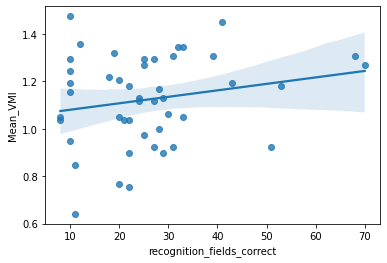

In [ ]:
sns.regplot(x='recognition_fields_correct', y='Mean_VMI', data=data);
data['recognition_fields_correct'].corr(data['Mean_VMI'])

0.6981510237384677

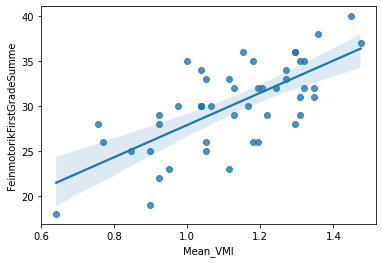

In [ ]:
sns.regplot(x='Mean_VMI', y='FeinmotorikFirstGradeSumme', data=data);
data['Mean_VMI'].corr(data['FeinmotorikFirstGradeSumme'])

0.08888319703019398

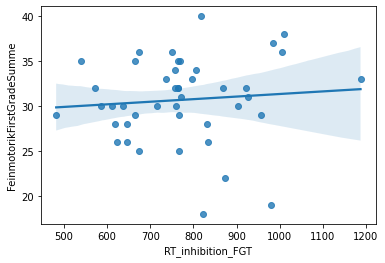

In [ ]:
#Ef = 'RT_inhibition_FGT'
# Fine motor: 'FeinmotorikFirstGradeSumme' 
# visual-motor integration: 'Mean_VMI'
sns.regplot(x='RT_inhibition_FGT', y='FeinmotorikFirstGradeSumme', data=data);
data['RT_inhibition_FGT'].corr(data['FeinmotorikFirstGradeSumme'])

0.10349781788019802

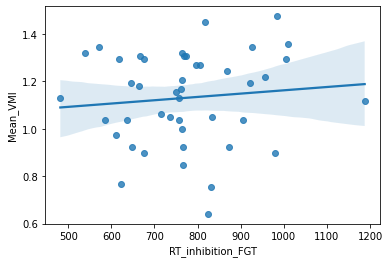

In [ ]:
sns.regplot(x='RT_inhibition_FGT', y='Mean_VMI', data=data);
data['RT_inhibition_FGT'].corr(data['Mean_VMI'])

0.6981510237384677

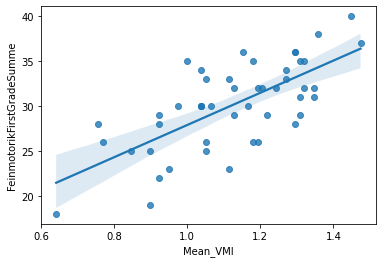

In [ ]:
sns.regplot(x='Mean_VMI', y='FeinmotorikFirstGradeSumme', data=data);
data['Mean_VMI'].corr(data['FeinmotorikFirstGradeSumme'])

0.0644294473432135

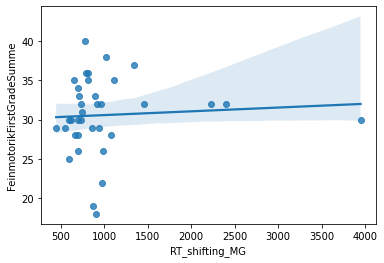

In [ ]:
#Ef = 'RT_shifting_MG'
# Fine motor: 'FeinmotorikFirstGradeSumme' 
# visual-motor integration: 'Mean_VMI'
sns.regplot(x='RT_shifting_MG', y='FeinmotorikFirstGradeSumme', data=data);
data['RT_shifting_MG'].corr(data['FeinmotorikFirstGradeSumme'])

0.1498319688204317

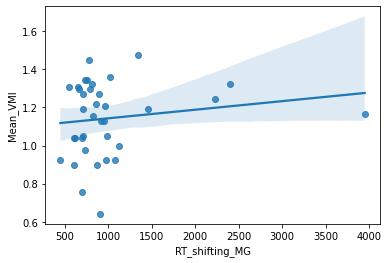

In [ ]:
sns.regplot(x='RT_shifting_MG', y='Mean_VMI', data=data);
data['RT_shifting_MG'].corr(data['Mean_VMI'])

0.6981510237384677

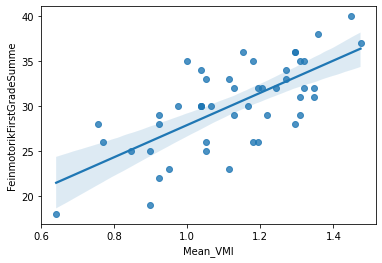

In [ ]:
sns.regplot(x='Mean_VMI', y='FeinmotorikFirstGradeSumme', data=data);
data['Mean_VMI'].corr(data['FeinmotorikFirstGradeSumme'])

Do fine motor skills in kindergarten predict handwriting (fluency and time on paper) in first grade (linear regression)?

In [ ]:
 # Die einzelnen Korrelationskoeffizienten könnten wir dann in eine Tabelle tun. 
FM_FS2 = data[['FineMotor_2018', 'NIV', 'TIMEON', 'TIMEOFF']]
FM_FS2.corr()

,FineMotor_2018,NIV,TIMEON,TIMEOFF
FineMotor_2018,1.000000,-0.161057,-0.135278,-0.104363
NIV,-0.161057,1.000000,0.757053,0.415384
TIMEON,-0.135278,0.757053,1.000000,0.652686
TIMEOFF,-0.104363,0.415384,0.652686,1.000000


-0.16105654609398445

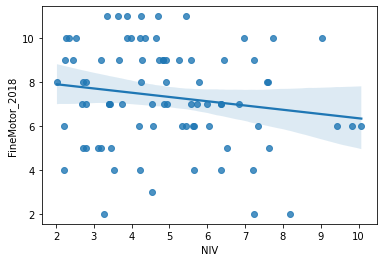

In [ ]:
sns.regplot(x='NIV', y='FineMotor_2018', data=data);
data['NIV'].corr(data['FineMotor_2018'])

-0.13527790116018906

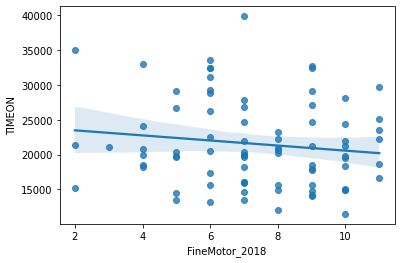

In [ ]:
sns.regplot(x='FineMotor_2018', y='TIMEON', data=data);
data['FineMotor_2018'].corr(data['TIMEON'])

-0.1043633415834345

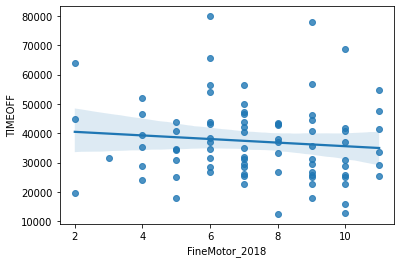

In [ ]:
sns.regplot(x='FineMotor_2018', y='TIMEOFF', data=data);
data['FineMotor_2018'].corr(data['TIMEOFF'])

Do fine motor skills in kindergarten predict executive functions in first grade (even when controlling for concurrent fine motor skills in first grade? (linear regression)?

In [ ]:
FM_FS3 = data[['FineMotor_2018', 'recognition_fields_correct', 'RT_inhibition_FGT', 'RT_shifting_MG']]
FM_FS3.corr()

,FineMotor_2018,recognition_fields_correct,RT_inhibition_FGT,RT_shifting_MG
FineMotor_2018,1.000000,0.139151,-0.072937,-0.075518
recognition_fields_correct,0.139151,1.000000,-0.095710,-0.164424
RT_inhibition_FGT,-0.072937,-0.095710,1.000000,0.243242
RT_shifting_MG,-0.075518,-0.164424,0.243242,1.000000


0.1391509618974608

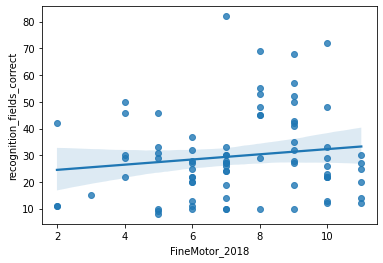

In [ ]:
# Welche Variable soll ich für executive functions nehmen? Michelle: Siehe Vorschlag oben
# Du hesches genau guet gmacht mite Achse (fauses per Zuefau so gwäut hesch: Ufder vertikale (y-Achse) wird ir Regu di abhängigi Variable, aso die wome wott vorussäge abbiduet (z.B. EF, NIV) u ufder horizontale (x-Achse) die unabhängigi (Finmotorik KG)
sns.regplot(x='FineMotor_2018', y='recognition_fields_correct', data=data);
data['FineMotor_2018'].corr(data['recognition_fields_correct'])

-0.07293684830839754

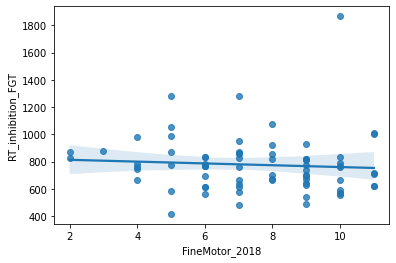

In [ ]:
sns.regplot(x='FineMotor_2018', y='RT_inhibition_FGT', data=data);
data['FineMotor_2018'].corr(data['RT_inhibition_FGT'])

-0.07551759111883251

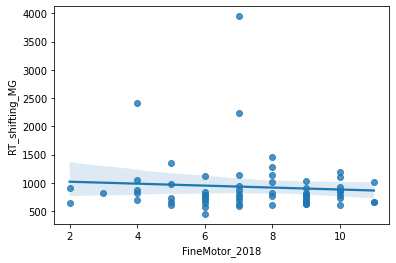

In [ ]:
sns.regplot(x='FineMotor_2018', y='RT_shifting_MG', data=data);
data['FineMotor_2018'].corr(data['RT_shifting_MG'])